In [1]:
import numpy as np

In [22]:
a = np.array([
    [1, 2],
    [2, 3],
    [3, 4]
])
b = np.array([10, 20])

print(a + b)
print(a * b)
print((a @ b.T).reshape(-1, 1))

[[11 22]
 [12 23]
 [13 24]]
[[10 40]
 [20 60]
 [30 80]]
[[ 50]
 [ 80]
 [110]]


In [23]:
a[a > 3]

array([4])

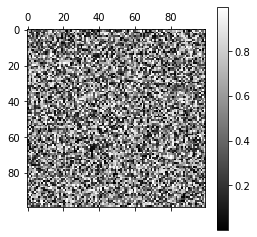

In [24]:
import matplotlib.pyplot as plt
X = np.random.rand(100, 100)
plt.matshow(X, cmap='gray')
plt.colorbar()

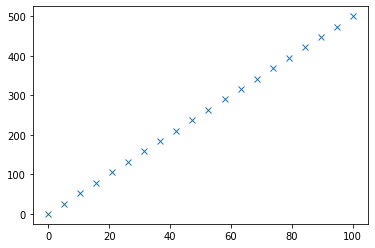

In [25]:
x = np.linspace(0, 100, 20)
plt.plot(x, x * 5, 'x')

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


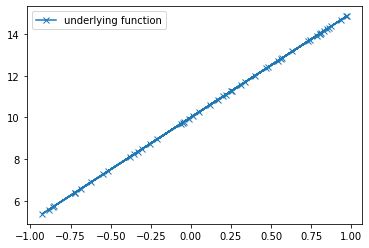

In [26]:
n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x * weights_true.T + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

In [27]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
#     print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
#     print('gradient.shape, gradient', gradient.shape, gradient)
    self.weights_gradient = self.x.T @ gradient
#     print('self.weights_gradient.shape, self.weights_gradient', self.weights_gradient.shape, self.weights_gradient)
    self.bias_gradient = gradient.sum(axis=0)
#     print('self.bias_gradient.shape, self.bias_gradient', self.bias_gradient.shape, self.bias_gradient)
    self.x_gradient = gradient @ self.weights.T
#     print('self.x_gradient.shape, self.x_gradient', self.x_gradient.shape, self.x_gradient)
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [28]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

110.52411328022357
69.67262142863919


Epoch 0, loss 124.49472340716717
Epoch 5, loss 13.543070240772789
Epoch 10, loss 1.941607685095899
Epoch 15, loss 0.4956778372112711
Epoch 20, loss 0.20306002553456665
Epoch 25, loss 0.09831544739281751
Epoch 30, loss 0.04946560337354393
Epoch 35, loss 0.02508207115752381


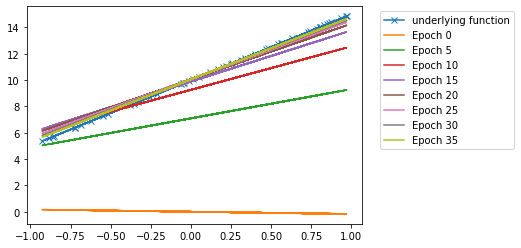

In [29]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
    y_pred = linear(x)
    loss_value = loss(y_pred, y_true)

    if epoch % 5 == 0:
        print(f'Epoch {epoch}, loss {loss_value}')
        plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

    gradient_from_loss = loss.backward()
    linear.backward(gradient_from_loss)
    linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


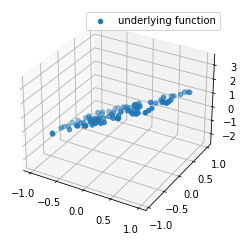

In [30]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
    plt.legend()

plot_3d(x, y_true)

1.911754668761557


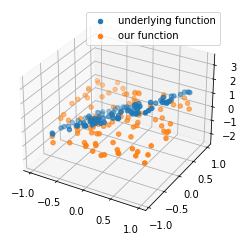

In [31]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 1.911754668761557
Epoch 1, loss 1.6190912447829904
Epoch 2, loss 1.377401139785928
Epoch 3, loss 1.1758240540482021
Epoch 4, loss 1.0063778493658568
Epoch 5, loss 0.8630639723048135
Epoch 6, loss 0.7412757352843309
Epoch 7, loss 0.6374029359494601
Epoch 8, loss 0.5485643487728177
Epoch 9, loss 0.47242399810950675
Epoch 10, loss 0.4070627473467779
Epoch 11, loss 0.3508867653310891
Epoch 12, loss 0.3025608737697556
Epoch 13, loss 0.26095892635268514
Epoch 14, loss 0.22512604616555523
Epoch 15, loss 0.19424927995239571
Epoch 16, loss 0.1676343534981037
Epoch 17, loss 0.14468694801478546
Epoch 18, loss 0.12489740145956549
Epoch 19, loss 0.10782806003786145


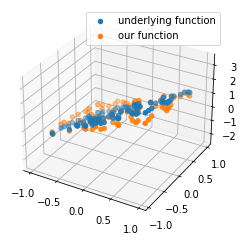

In [32]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    for epoch in range(num_epochs):
        y_pred = model(x)
        loss_value = loss(y_pred, y)
        print(f'Epoch {epoch}, loss {loss_value}')
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

In [33]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


1.104305956930594


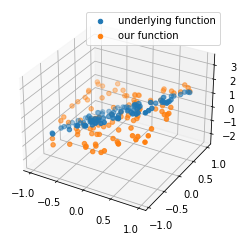

In [34]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [35]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

2.649635520222982
1.6513869300029886


Epoch 0, loss 1.6513869300029886
Epoch 1, loss 1.1858706434792232
Epoch 2, loss 0.9027891729970254
Epoch 3, loss 0.7167415757961129
Epoch 4, loss 0.5874475557669285
Epoch 5, loss 0.4934966834299674
Epoch 6, loss 0.4242700857806731
Epoch 7, loss 0.37160881561888276
Epoch 8, loss 0.330790245589567
Epoch 9, loss 0.29806085679924427
Epoch 10, loss 0.27045084150187015
Epoch 11, loss 0.24561354373420513
Epoch 12, loss 0.22417062452815967
Epoch 13, loss 0.2053424327455673
Epoch 14, loss 0.18876690991063
Epoch 15, loss 0.17388018158567178
Epoch 16, loss 0.1604662250838041
Epoch 17, loss 0.14828579647264106
Epoch 18, loss 0.13694999078108394
Epoch 19, loss 0.126449669889483
Epoch 20, loss 0.11697940452031352
Epoch 21, loss 0.10840016989554202
Epoch 22, loss 0.10060087933951642
Epoch 23, loss 0.09355623479280128
Epoch 24, loss 0.08705711983757608
Epoch 25, loss 0.08086692872891615
Epoch 26, loss 0.07521534234752371
Epoch 27, loss 0.06987484501494191
Epoch 28, loss 0.06474516325831176
Epoch 29, l

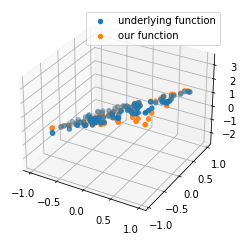

In [36]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

In [37]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(2.2187, grad_fn=<MseLossBackward>)


In [38]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(2.2187, grad_fn=<MseLossBackward>)
tensor(1.8058, grad_fn=<MseLossBackward>)


tensor(1.8058, grad_fn=<MseLossBackward>)
tensor(1.5012, grad_fn=<MseLossBackward>)
tensor(1.2449, grad_fn=<MseLossBackward>)
tensor(1.0206, grad_fn=<MseLossBackward>)
tensor(0.8233, grad_fn=<MseLossBackward>)
tensor(0.6517, grad_fn=<MseLossBackward>)
tensor(0.5052, grad_fn=<MseLossBackward>)
tensor(0.3837, grad_fn=<MseLossBackward>)
tensor(0.2864, grad_fn=<MseLossBackward>)
tensor(0.2110, grad_fn=<MseLossBackward>)
tensor(0.1543, grad_fn=<MseLossBackward>)
tensor(0.1126, grad_fn=<MseLossBackward>)
tensor(0.0828, grad_fn=<MseLossBackward>)
tensor(0.0618, grad_fn=<MseLossBackward>)
tensor(0.0472, grad_fn=<MseLossBackward>)
tensor(0.0371, grad_fn=<MseLossBackward>)
tensor(0.0300, grad_fn=<MseLossBackward>)
tensor(0.0250, grad_fn=<MseLossBackward>)
tensor(0.0215, grad_fn=<MseLossBackward>)
tensor(0.0189, grad_fn=<MseLossBackward>)
tensor(0.0170, grad_fn=<MseLossBackward>)
tensor(0.0155, grad_fn=<MseLossBackward>)
tensor(0.0144, grad_fn=<MseLossBackward>)
tensor(0.0134, grad_fn=<MseLossBac

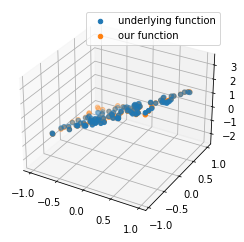

In [39]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())